# **G2M Insight for Cab Investment Firm EDA + Hypothesis Testing** 

# By: Zakaria Arshad

In [160]:
import numpy as np
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.proportion as smp
from scipy import stats
from scipy.stats import ttest_ind


In [ ]:
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
city_df = pd.read_csv('/content/drive/MyDrive/Data Glacier/EDA_Data_Sets/City.csv')
cab_data_df = pd.read_csv('/content/drive/MyDrive/Data Glacier/EDA_Data_Sets/Cab_Data.csv')
customer_id_df = pd.read_csv('/content/drive/MyDrive/Data Glacier/EDA_Data_Sets/Customer_ID.csv')
transaction_id_df = pd.read_csv('/content/drive/MyDrive/Data Glacier/EDA_Data_Sets/Transaction_ID.csv')

# 1) Examine Individual Datasets

## 1.1) City Dataset

In [ ]:
city_df.head(3)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"


In [ ]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [ ]:
# Need to remove commas from Population and Users columns, and change datatype of these two columns to int

In [ ]:
city_df = city_df.apply(lambda x: x.str.replace(',', ''))

In [ ]:
city_df['Population'] = city_df['Population'].astype(int)
city_df['Users'] = city_df['Users'].astype(int)

In [ ]:
city_df.head(3)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132


In [ ]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [ ]:
city_df.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [ ]:
city_df.duplicated().sum()

0

## 1.2) Cab Dataset

In [ ]:
cab_data_df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [ ]:
cab_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
# Need to change Date of Travel column to DateTime
cab_data_df['Date of Travel'] = pd.to_datetime(cab_data_df['Date of Travel'], unit='d', origin='1899-12-29')

In [ ]:
cab_data_df['Date of Travel'].head(3)

0   2016-01-07
1   2016-01-05
2   2016-01-01
Name: Date of Travel, dtype: datetime64[ns]

In [ ]:
cab_data_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [ ]:
cab_data_df['Company'].unique()
# these are the companies we need to compare and analyze

array(['Pink Cab', 'Yellow Cab'], dtype=object)

## 1.3) Customer Dataset

In [ ]:
customer_id_df.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


In [ ]:
customer_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [ ]:
customer_id_df.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


## 1.4) Transaction dataset

In [ ]:
transaction_id_df.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


In [ ]:
transaction_id_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [ ]:
transaction_id_df.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [ ]:
len(cab_data_df)

359392

## 1.5) Merge Datasets

In [ ]:
df = cab_data_df.merge(transaction_id_df, on='Transaction ID').merge(customer_id_df, on='Customer ID').merge(city_df, on='City')

In [ ]:
df.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,2018-07-20,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,2018-11-22,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701


In [ ]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000


## 2) Visualize the Dataset and View Correlations

In [ ]:
corr = df.corr()
print(corr)

                    Transaction ID  KM Travelled  Price Charged  Cost of Trip  \
Transaction ID            1.000000     -0.001429      -0.052902     -0.003462   
KM Travelled             -0.001429      1.000000       0.835753      0.981848   
Price Charged            -0.052902      0.835753       1.000000      0.859812   
Cost of Trip             -0.003462      0.981848       0.859812      1.000000   
Customer ID              -0.016912      0.000389      -0.177324      0.003077   
Age                      -0.001267     -0.000369      -0.003084     -0.000189   
Income (USD/Month)       -0.001570     -0.000544       0.003228     -0.000633   
Population                0.023868     -0.002311       0.326589      0.015108   
Users                     0.013526     -0.000428       0.281061      0.023628   

                    Customer ID       Age  Income (USD/Month)  Population  \
Transaction ID        -0.016912 -0.001267           -0.001570    0.023868   
KM Travelled           0.000389 -0.

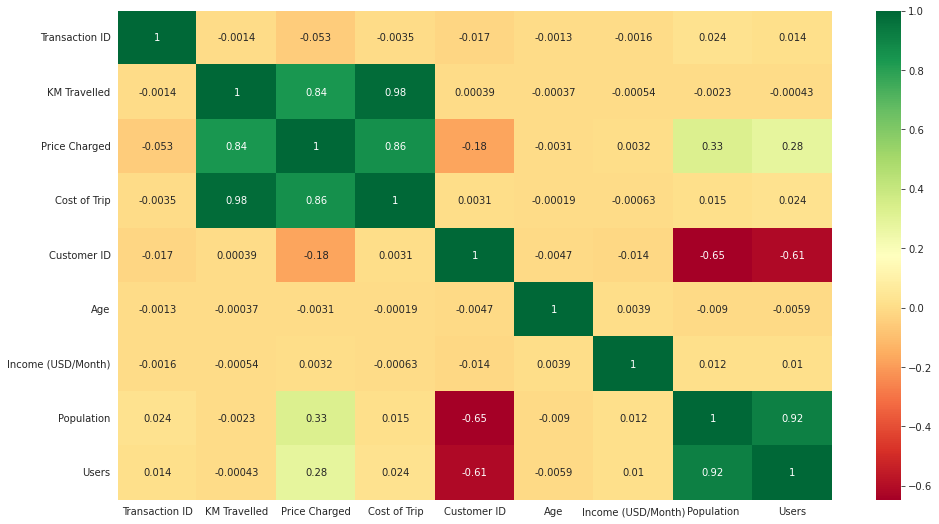

In [ ]:
plt.figure(figsize = (16,9))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

## Correlation results: 
The table shows a strong positive correlation between the Cost of Trip, Price Charged, and KM Travelled variables, as well as the Population and Users variable.

## 3) Perform Analysis to Gain Information

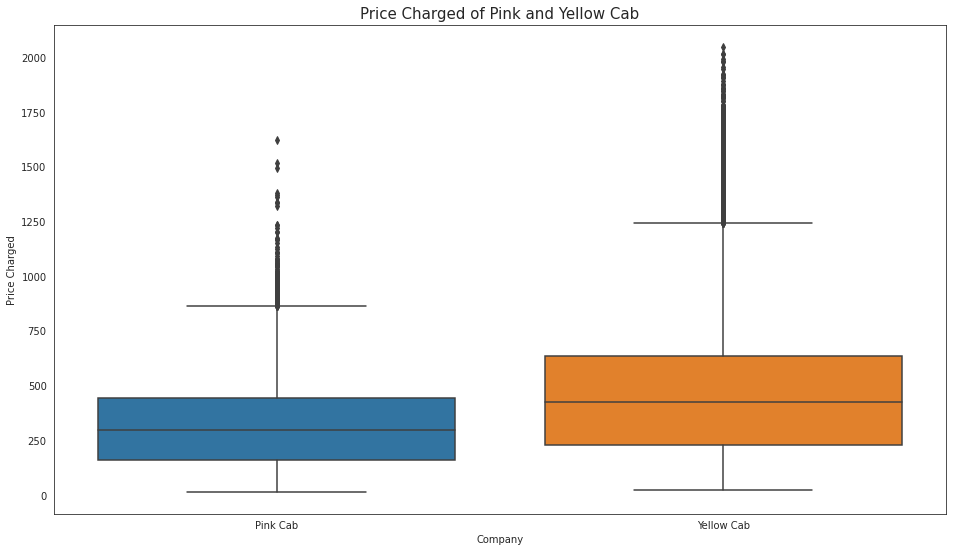

In [ ]:
sns.set_style('white')
plt.figure(figsize = (16, 9))
sns.boxplot(df['Company'], df['Price Charged'])
plt.title('Price Charged of Pink and Yellow Cab', fontsize=15)
plt.show()

In [ ]:
companies_df = df.groupby('Company')
result = companies_df['Price Charged'].mean()
print(result)

Company
Pink Cab      310.800856
Yellow Cab    458.181990
Name: Price Charged, dtype: float64


## 1) **Yellow cab** charges more than Pink Cab. On average, it is $148 more.

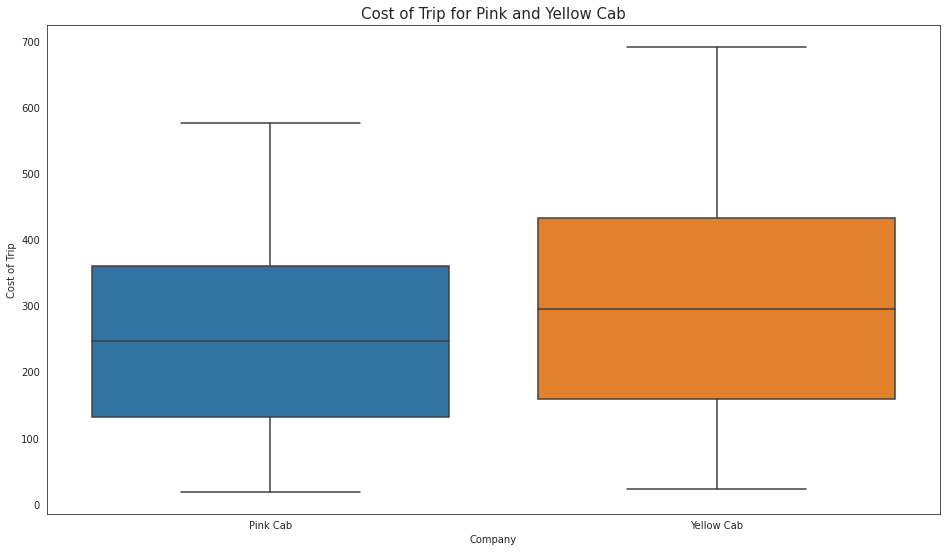

In [ ]:
plt.figure(figsize = (16, 9))
sns.boxplot(df['Company'], df['Cost of Trip'])
plt.title('Cost of Trip for Pink and Yellow Cab', fontsize=15)
plt.show()

In [ ]:
result = companies_df['Cost of Trip'].mean()
print(result)

Company
Pink Cab      248.148682
Yellow Cab    297.922004
Name: Cost of Trip, dtype: float64


## 2) The Cost of Trip for **Pink Cab** is $49 cheaper than Yellow Cab. 

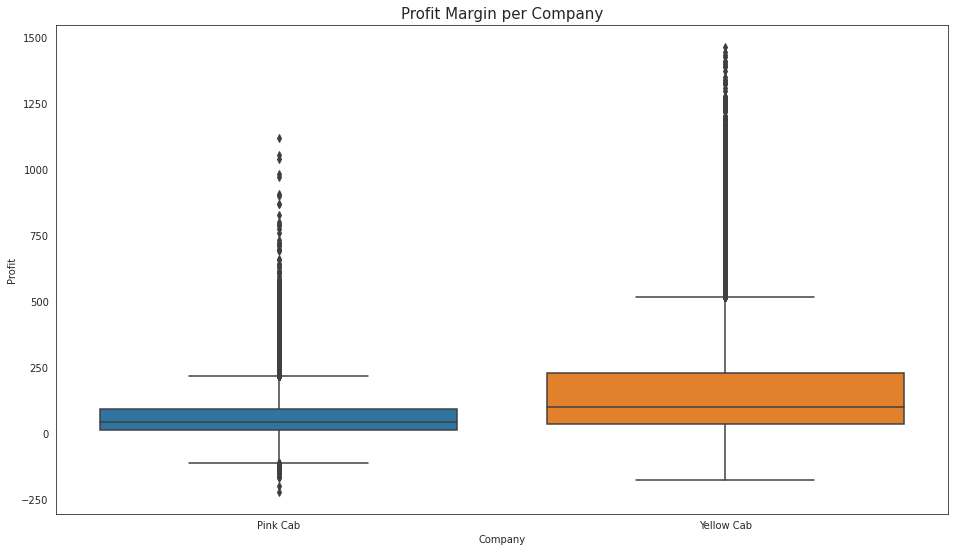

In [ ]:
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
# update Groupby DataFrame
companies_df = df.groupby('Company')
plt.figure(figsize = (16, 9))
sns.boxplot(df['Company'], df['Profit'])
plt.title('Profit Margin per Company', fontsize=15)
plt.show()

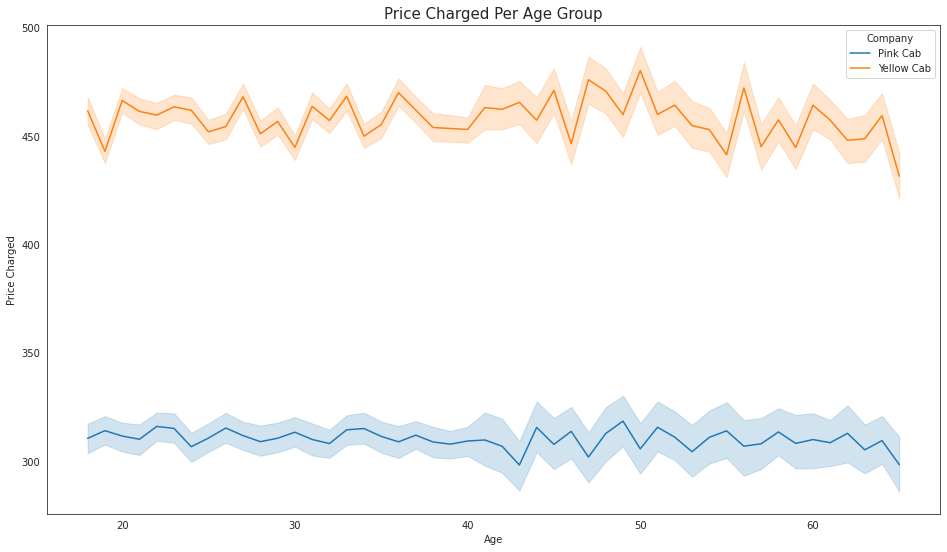

In [ ]:
plt.figure(figsize = (16, 9))
sns.lineplot(df['Age'], df['Price Charged'], data=df, hue='Company')
plt.title('Price Charged Per Age Group', fontsize=15)
plt.show()

In [ ]:
# Setting different columns for year, month, and day
df['Year'] = df['Date of Travel'].dt.year
df['Month'] = df['Date of Travel'].dt.month
df['Day'] = df['Date of Travel'].dt.day
result = companies_df['Profit'].mean()
print(result)

Company
Pink Cab       62.652174
Yellow Cab    160.259986
Name: Profit, dtype: float64


## 3) **Yellow Cab** has significantly more profit than Pink Cab on average, with $98 more.

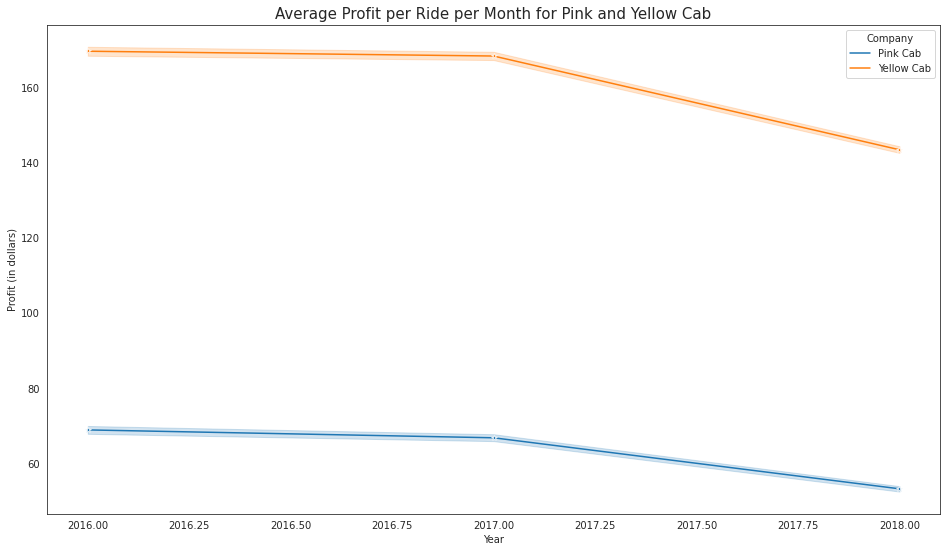

In [ ]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Profit', hue="Company", data=df, marker='*')
plt.xlabel("Year", size=10)
plt.ylabel("Profit (in dollars)", size=10)
plt.title("Average Profit per Ride per Month for Pink and Yellow Cab", fontsize=15)
plt.show()

## 4) The Yearly data shows declining average profit yearly for both companies, but **Pink Cab's** is falling slower. However, **Yellow Cab's** profit in general has always been higher than Pink Cab is the given timeframe.

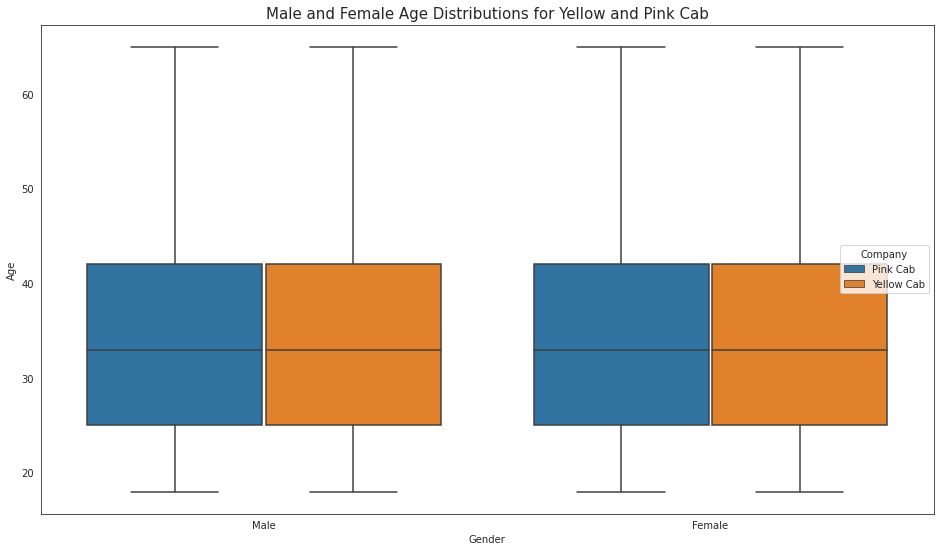

In [ ]:
plt.figure(figsize = (16, 9))
sns.boxplot(df['Gender'], df['Age'], data=df, hue='Company')
plt.title("Male and Female Age Distributions for Yellow and Pink Cab", fontsize = 15)
plt.show()

In [ ]:
print(df.groupby('Company')['Age'].mean())

Company
Pink Cab      35.322414
Yellow Cab    35.341112
Name: Age, dtype: float64


## 5) The average age for both genders is extremely similar across **both** companies. 

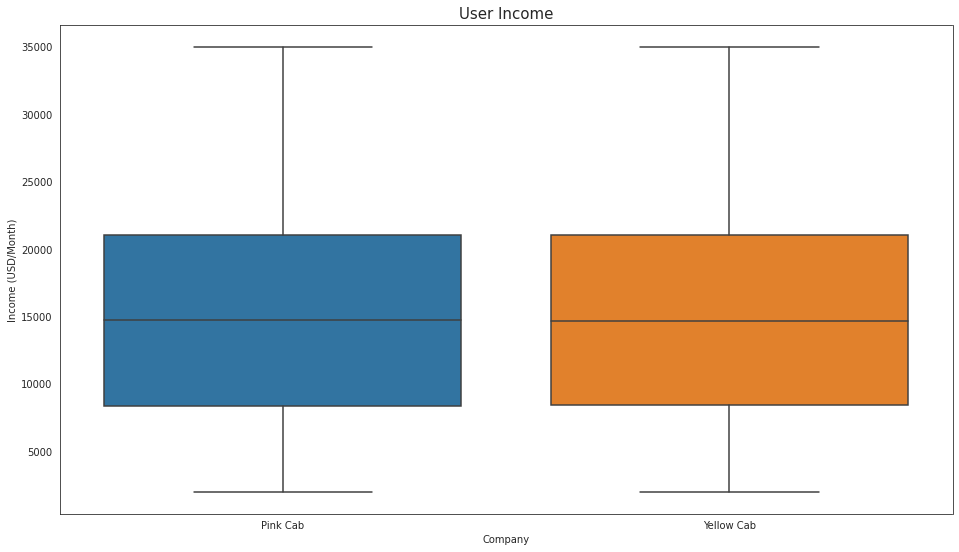

In [ ]:
plt.figure(figsize = (16, 9))
sns.boxplot(df['Company'], df['Income (USD/Month)'])
plt.title('User Income', fontsize=15)
plt.show()

## 6) User income is extremely similar across **both** companies.

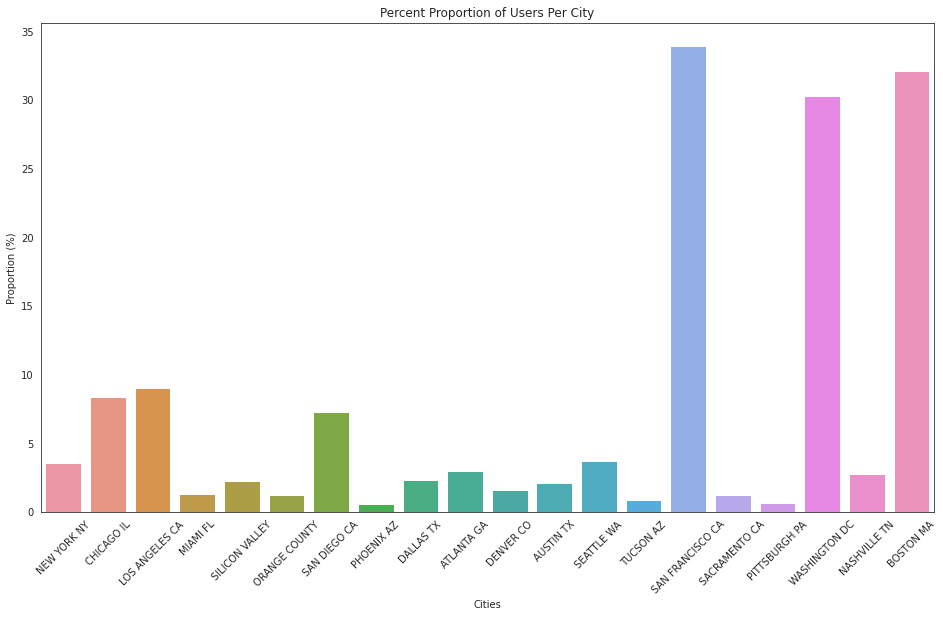

In [ ]:
## Calculate proportion of users in each city
city_df['Proportion of Users'] = city_df['Users'] / city_df['Population'] * 100
plt.figure(figsize = (16, 9))
sns.barplot(x='City', y='Proportion of Users', data=city_df)
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('Proportion (%)')
plt.title('Percent Proportion of Users Per City')
plt.show()

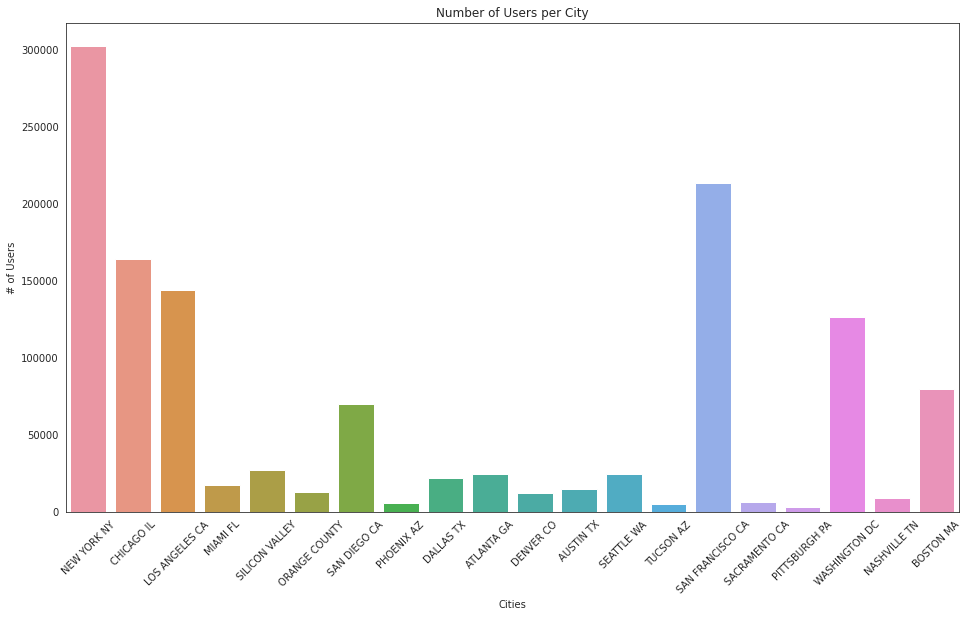

In [ ]:
plt.figure(figsize = (16, 9))
sns.barplot(x='City', y='Users', data=city_df)
plt.xticks(rotation=45)
plt.xlabel('Cities')
plt.ylabel('# of Users')
plt.title('Number of Users per City')
plt.show()

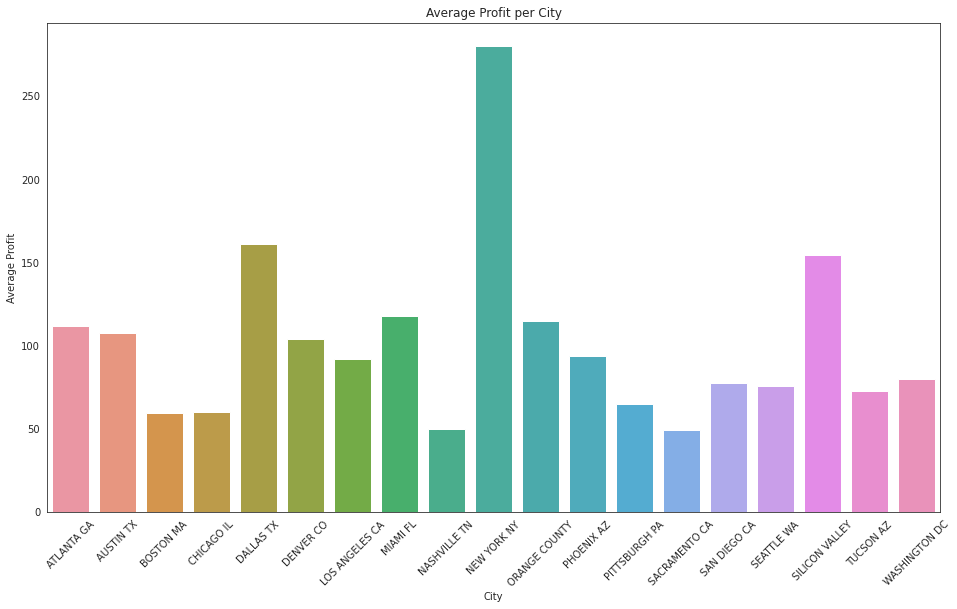

In [ ]:
plt.figure(figsize = (16, 9))
city_profit_df = df.groupby('City')
average_profit_per_city = city_profit_df['Profit'].mean()
sns.barplot(x=average_profit_per_city.index, y=average_profit_per_city.values)
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Average Profit')
plt.title('Average Profit per City')
plt.show()

## 7) The top three cities for total users are **New York City, San Fransisco, and Chicago**. In proportion to the population of the city, **San Fransisco, Boston, and Washington DC** are the top three. Finally, the cities with the highest profit margins are **New York City, Dallas, and Silicon Valley**.

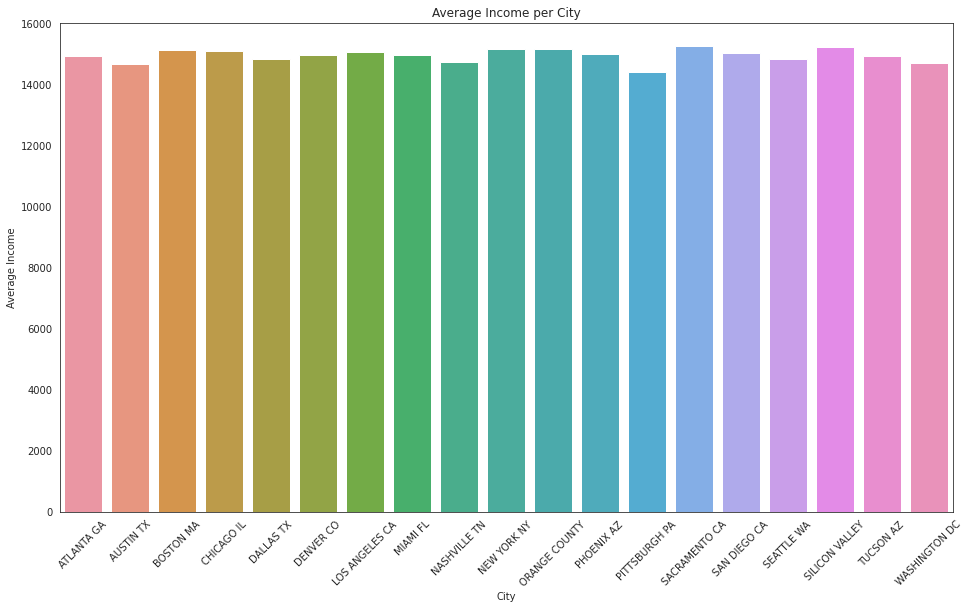

In [ ]:
grouped = df.groupby('City')
mean_income = grouped['Income (USD/Month)'].mean().reset_index(name='Mean Income')

plt.figure(figsize=(16, 9))
sns.barplot(x='City', y='Mean Income', data=mean_income)

plt.title('Average Income per City')
plt.xlabel('City')
plt.xticks(rotation=45)

plt.ylabel('Average Income')

plt.show()

## 8) Average income is relatively **equal** across users in each city

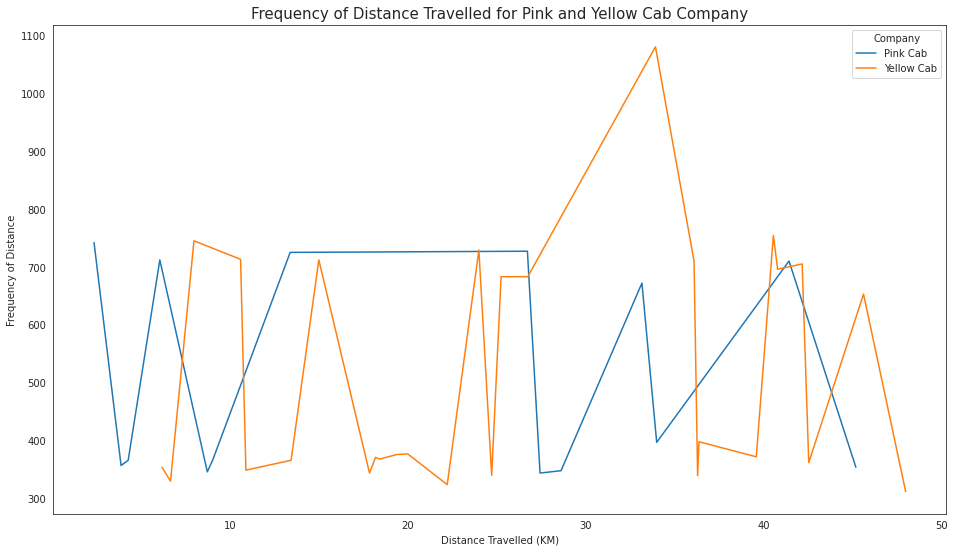

In [ ]:
plt.figure(figsize = (16, 9))
sns.lineplot(x=df['KM Travelled'], y=df['KM Travelled'].value_counts().sort_index(),
             color='blue', hue=df['Company'])
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Frequency of Distance')
plt.title('Frequency of Distance Travelled for Pink and Yellow Cab Company', fontsize=15)
plt.show()

## 9) The **Yellow Cab** is used more commonly after 25 km, while Pink Cab appears more popular before 25 km.

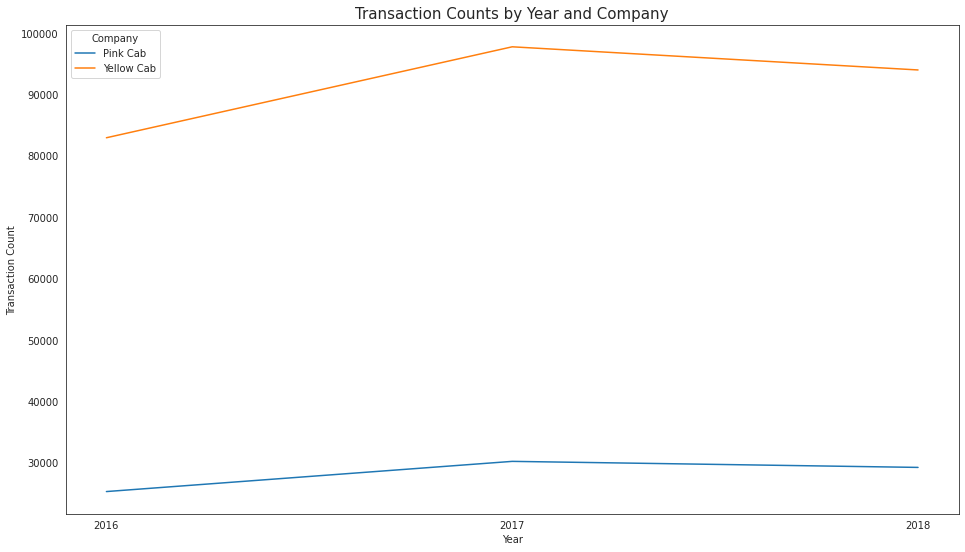

In [ ]:
grouped = df.groupby(['Year', 'Company'])
result = grouped['Transaction ID'].count().reset_index(name='Count')

plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='Count', hue='Company', data=result)
# add a title and labels to the graph
plt.title('Transaction Counts by Year and Company', fontsize=15)
plt.xlabel('Year')
plt.xticks([2016, 2017, 2018])
plt.ylabel('Transaction Count')

# show the plot
plt.show()

## 10) The **Yellow Cab** has far more transactions than the Pink Cab. However, the Pink Cab had less of a decline in transactions from 2017 to 2018 than the Yellow Cab.

# **Hypothesis Testing** (95% Confidence Interval)

## **Hypothesis 1:** The Yellow Cab is more often used for trips over 25km.

Null Hypothesis: There is not a signfiicant difference in the usage of Yellow Cab compared to Pink Cab for trips over 25km. 

In [ ]:
pink_cab = df[(df['Company'] == 'Pink Cab') & (df['KM Travelled'] > 25)]
yellow_cab = df[(df['Company'] == 'Yellow Cab') & (df['KM Travelled'] > 25)]

# Conduct two-sample t-test
stat, p_value = ttest_ind(pink_cab['KM Travelled'], yellow_cab['KM Travelled'])

# Print results
print(f"The t-statistic is {stat:.3f}.")

# Interpret results
if p_value < 0.05:
    print(f"The result is statistically significant (p = {p_value:.3f}).")
else:
    print(f"The result is not statistically significant (p = {p_value:.3f}).")

The t-statistic is -0.140.
The result is not statistically significant (p = 0.889).


## **Hypothesis 2:** The Yellow Cab has a higher average user income
Null Hypothesis: There is no difference in user income across users

In [ ]:
yellow_cab_users = df[df["Company"] == "Yellow Cab"]["Income (USD/Month)"]
pink_cab_users = df[df["Company"] == "Pink Cab"]["Income (USD/Month)"]

# Calculate the means of each population
yellow_mean = yellow_cab_users.mean()
pink_mean = pink_cab_users.mean()

# Conduct a two-sample t-test
t_stat, p_val = ttest_ind(yellow_cab_users, pink_cab_users, equal_var=False)

# Interpret the results
if p_val < 0.05:
    print(f"The difference in mean income between Yellow Cab users and Pink Cab users is significant (p = {p_val})")
else:
    print(f"The difference in mean income between Yellow Cab users and Pink Cab users is not significant (p = {p_val})")

The difference in mean income between Yellow Cab users and Pink Cab users is not significant (p = 0.6698818568949252)


# **Hypothesis 3:** There is an age group where Yellow Cab is significantly more popular than Pink Cab (and no age groups where Pink Cab is more popular).
Null Hypothesis: Both cabs are equally used across all age groups.
Age groups used: 18, 25, 33 42, 65. This is the minimum, 25%, 50%, 75%, and maximum for age. 

In [ ]:
# To conduct this experiment, make DataFrames for each filtered age range.
df1 = df[(df['Age'] >= 18) & (df['Age'] <= 25) & (df['Company'] == 'Yellow Cab')]
df2 = df[(df['Age'] >= 18) & (df['Age'] <= 25) & (df['Company'] == 'Pink Cab')]
df3 = df[(df['Age'] >= 26) & (df['Age'] <= 33) & (df['Company'] == 'Yellow Cab')]
df4 = df[(df['Age'] >= 26) & (df['Age'] <= 33) & (df['Company'] == 'Pink Cab')]
df5 = df[(df['Age'] >= 34) & (df['Age'] <= 42) & (df['Company'] == 'Yellow Cab')]
df6 = df[(df['Age'] >= 34) & (df['Age'] <= 42) & (df['Company'] == 'Pink Cab')]
df7 = df[(df['Age'] >= 42) & (df['Age'] <= 65) & (df['Company'] == 'Yellow Cab')]
df8 = df[(df['Age'] >= 42) & (df['Age'] <= 65) & (df['Company'] == 'Pink Cab')]

In [ ]:
# Now check the p-values for each age range

# Age range 18 to 25
t_stat, p_value = ttest_ind(df1['Age'], df2['Age'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 18 to 25.")
else:
    print(f"There is no significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 18 to 25.")

# Age range 26 to 33
t_stat, p_value = ttest_ind(df3['Age'], df4['Age'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 26 to 33.")
else:
    print(f"There is no significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 26 to 33.")

# Age range 34 to 42
t_stat, p_value = ttest_ind(df5['Age'], df6['Age'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 34 to 42.")
else:
    print(f"There is no significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 34 to 42.")

# Age range 42 to 65
t_stat, p_value = ttest_ind(df7['Age'], df8['Age'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 42 to 65.")
else:
    print(f"There is no significant difference (p = {p_value}) in the number of users between Yellow Cab and Pink Cab in the age range 42.")


There is no significant difference (p = 0.11931074919589883) in the number of users between Yellow Cab and Pink Cab in the age range 18 to 25.
There is no significant difference (p = 0.179058781014713) in the number of users between Yellow Cab and Pink Cab in the age range 26 to 33.
There is no significant difference (p = 0.428645266922843) in the number of users between Yellow Cab and Pink Cab in the age range 34 to 42.
There is a significant difference (p = 0.018523274831705884) in the number of users between Yellow Cab and Pink Cab in the age range 42 to 65.


In [ ]:
yellow_count = df7['Age'].count()
pink_count = df8['Age'].count()

if yellow_count > pink_count:
    print(f"The mean age of users for Yellow Cab is higher ({yellow_count}) compared to Pink Cab ({pink_count}) in the age range of 42 to 65.")
else:
    print(f"The mean age of users for Pink Cab is higher ({pink_count}) compared to Yellow Cab ({yellow_count}) in the age range of 42 to 65.")

The mean age of users for Yellow Cab is higher (70654) compared to Pink Cab (21748) in the age range of 42 to 65.


## **Conclusion for Hypothesis 3**

There is a significant difference for the age group from the 75% to maximum values, favoring the Yellow Cab. It can be concluded that this age group heavily favors using Yellow Cab. While the cause for this cannot be determined from the dataset, it could be from some type of deal or opportunity for ages between 42 and 65 (senior discount, etc.).

# **Hypothesis 4:** There is a significant difference in profit margin for the above age groups. 

In [ ]:
df1 = df[(df['Age'] >= 18) & (df['Age'] <= 25) & (df['Company'] == 'Yellow Cab')]
df2 = df[(df['Age'] >= 18) & (df['Age'] <= 25) & (df['Company'] == 'Pink Cab')]
df3 = df[(df['Age'] >= 26) & (df['Age'] <= 33) & (df['Company'] == 'Yellow Cab')]
df4 = df[(df['Age'] >= 26) & (df['Age'] <= 33) & (df['Company'] == 'Pink Cab')]
df5 = df[(df['Age'] >= 34) & (df['Age'] <= 42) & (df['Company'] == 'Yellow Cab')]
df6 = df[(df['Age'] >= 34) & (df['Age'] <= 42) & (df['Company'] == 'Pink Cab')]
df7 = df[(df['Age'] >= 42) & (df['Age'] <= 65) & (df['Company'] == 'Yellow Cab')]
df8 = df[(df['Age'] >= 42) & (df['Age'] <= 65) & (df['Company'] == 'Pink Cab')]

In [ ]:
t_stat, p_value = ttest_ind(df1['Profit'], df2['Profit'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 18 to 25.")
else:
    print(f"There is no significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 18 to 25.")

# Age range 26 to 33
t_stat, p_value = ttest_ind(df3['Profit'], df4['Profit'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 26 to 33.")
else:
    print(f"There is no significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 26 to 33.")

# Age range 34 to 42
t_stat, p_value = ttest_ind(df5['Profit'], df6['Profit'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 34 to 42.")
else:
    print(f"There is no significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 34 to 42.")

# Age range 42 to 65
t_stat, p_value = ttest_ind(df7['Profit'], df8['Profit'])
if p_value < 0.05:
    print(f"There is a significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 42 to 65.")
else:
    print(f"There is no significant difference (p = {p_value}) in the profit margin between Yellow Cab and Pink Cab in the age range 42.")

There is a significant difference (p = 0.0) in the profit margin between Yellow Cab and Pink Cab in the age range 18 to 25.
There is a significant difference (p = 0.0) in the profit margin between Yellow Cab and Pink Cab in the age range 26 to 33.
There is a significant difference (p = 0.0) in the profit margin between Yellow Cab and Pink Cab in the age range 34 to 42.
There is a significant difference (p = 0.0) in the profit margin between Yellow Cab and Pink Cab in the age range 42 to 65.


In [ ]:
yellow_margin = df7['Profit'].mean()
pink_margin = df8['Profit'].mean()

if yellow_margin > pink_margin:
    print(f"The mean age of users for Yellow Cab is higher ({yellow_margin}) compared to Pink Cab ({pink_margin}) in the age range of 42 to 65.")
else:
    print(f"The mean age of users for Pink Cab is higher ({pink_margin}) compared to Yellow Cab ({yellow_margin}) in the age range of 42 to 65.")

The mean age of users for Yellow Cab is higher (160.06016620148893) compared to Pink Cab (62.12054726871437) in the age range of 42 to 65.


## **Conclusion for Hypothesis 4**
There is a significant difference in the profit margin between Yellow Cab and Pink Cab in all age ranges, in every age range. 

In [ ]:
# Ideas to test: 

# Is Yellow Cab used for longer trips, and Pink Cab for shorter trips? Check prices before 25km and after
# How does income of user affect which cab company they use? Guess: Yellow Cab used more for higher income
# Does gender affect what cab is used? Guess: No
# Does age affect what cab is used more frequently? Guess: Yes
# Does price change depending on age? Guess : Yes



# **Hypothesis 5: Is there a difference in Profit Margin between Genders for the two companies?**

In [ ]:
pink_cab = df[df['Company'] == 'Pink Cab']
yellow_cab = df[df['Company'] == 'Yellow Cab']

# Split the dataframes by gender
pink_cab_male = pink_cab[pink_cab['Gender'] == 'Male']
pink_cab_female = pink_cab[pink_cab['Gender'] == 'Female']
yellow_cab_male = yellow_cab[yellow_cab['Gender'] == 'Male']
yellow_cab_female = yellow_cab[yellow_cab['Gender'] == 'Female']

# Perform t-tests for Pink Cab
t_stat, p_value = stats.ttest_ind(pink_cab_male['Profit'], pink_cab_female['Profit'], equal_var=False)
print("For Pink Cab, the p-value of the t-test for difference between male and female profit is:", p_value)

if p_value < .05:
  print("The difference between male and female profit for Pink Cab is significantly different.")
else:
  print("The difference between male and female profit for Pink Cab is not significantly different.")
# Perform t-tests for Yellow Cab
t_stat, p_value = stats.ttest_ind(yellow_cab_male['Profit'], yellow_cab_female['Profit'], equal_var=False)
print("For Yellow Cab, the p-value of the t-test for difference between male and female profit is:", p_value)
if p_value < .05:
  print("The difference between male and female profit for Pink Cab is significantly different.")
else:
  print("The difference between male and female profit for Pink Cab is not significantly different.")


For Pink Cab, the p-value of the t-test for difference between male and female profit is: 0.11501217119514037
The difference between male and female profit for Pink Cab is not significantly different.
For Yellow Cab, the p-value of the t-test for difference between male and female profit is: 3.2583323717893496e-25
The difference between male and female profit for Pink Cab is significantly different.


In [ ]:
yellow_cab_male_mean = yellow_cab_male['Profit'].mean()
yellow_cab_female_mean = yellow_cab_female['Profit'].mean()
print(f'The yellow cab male mean profit is {yellow_cab_male_mean} while the yellow cab female mean profit is {yellow_cab_female_mean}.')

The yellow cab male mean profit is 163.1509476093546 while the yellow cab female mean profit is 156.30532459655174.


## **Conclusion for Hypothesis 5**
There is only a significant difference for the Yellow Cab between males and females, with males having more mean profit.

# **Overall Conclusion**

The **Yellow Cab** is the reccomended investment. It has a much greater profit margin, is more popular with age groups 42-65, and has far more users. In most other categories, it is extremely similar with pink cab, such as customer demographics (income, etc.). Both companies show a trend of declining profits over the last year, however the high difference between Yellow Cab's profits to Pink Cab's profits make this disregardable for the time. Even with Yellow Cab's much higher prices, they still have more users. Overall, **Yellow Cab** seems to be the wisest investment. 